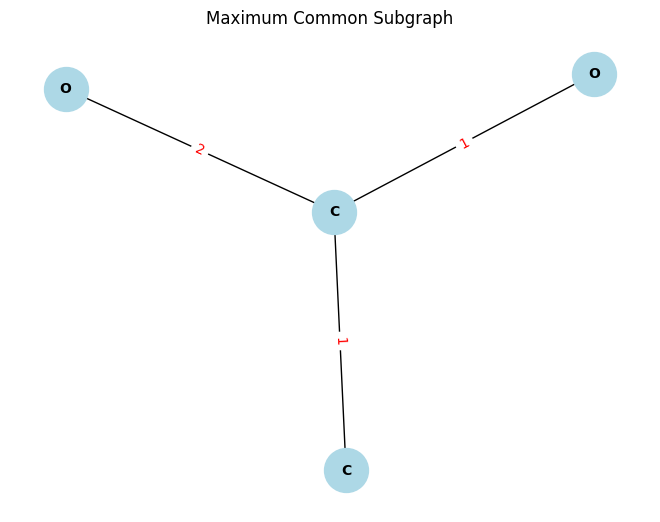

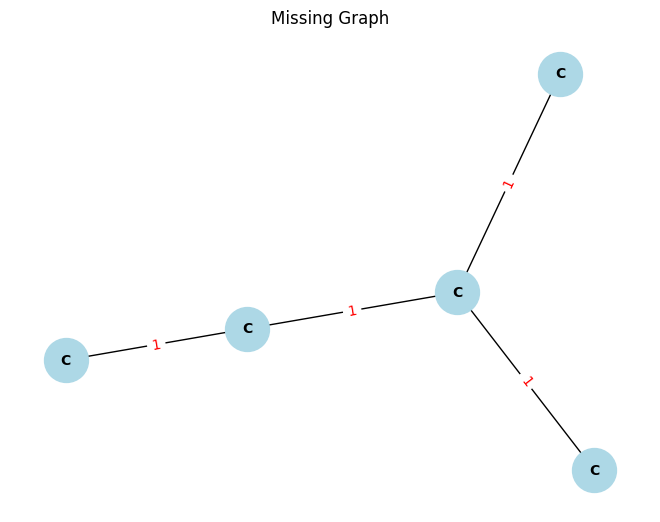

In [86]:
import networkx as nx
from pysmiles import read_smiles
import matplotlib.pyplot as plt

class ChemicalGraph:
    @staticmethod
    def smiles_to_graph(smiles):
        # Convert a SMILES string to a NetworkX graph
        return read_smiles(smiles, explicit_hydrogen=False)

    @staticmethod
    def display(graph, title='Graph'):
        # Display the given graph using networkx and matplotlib
        pos = nx.spring_layout(graph)
        node_labels = {node: data.get('element', node) for node, data in graph.nodes(data=True)}
        nx.draw(graph, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
        edge_labels = {(u, v): data.get('order', '') for u, v, data in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
        plt.title(title)
        plt.show()

    @staticmethod
    def find_mcs(ref_graph, hit_graph, ignore_atom_type=False, ignore_bond_type=False):
        # Find the Maximum Common Subgraph (MCS) between two graphs
        node_match_func = lambda a, b: ((a['element'] == b['element']) and (a['charge'] == b['charge']) and (a['aromatic'] == b['aromatic'])) or ignore_atom_type
        edge_match_func = lambda a, b: (a['order'] == b['order']) or ignore_bond_type
        GM = nx.algorithms.isomorphism.GraphMatcher(ref_graph, hit_graph, node_match=node_match_func, edge_match=edge_match_func)
        try:
            mcs = max(GM.subgraph_isomorphisms_iter(), key=len)
            return ref_graph.subgraph(mcs)
        except ValueError:
            return None

    @staticmethod
    def subtract_graphs(main_graph, sub_graph):
        # Subtract sub_graph from main_graph
        unique_graph = main_graph.copy()
        for node in sub_graph.nodes():
            if node in unique_graph:
                unique_graph.remove_node(node)
        return unique_graph
    
    

# Example usage
reactant_graph = ChemicalGraph.smiles_to_graph('CC(CC)COC(=O)C')
product_graph = ChemicalGraph.smiles_to_graph('CC(=O)O')

mcs_graph = ChemicalGraph.find_mcs(reactant_graph, product_graph)

if mcs_graph:
    ChemicalGraph.display(nx.Graph(mcs_graph), 'Maximum Common Subgraph')
else:
    print("No Maximum Common Subgraph found.")

if len(reactant_graph.nodes) >= len(mcs_graph.nodes):
    missing_graph = ChemicalGraph.subtract_graphs(reactant_graph, mcs_graph)
else:
    missing_graph = ChemicalGraph.subtract_graphs(product_graph, mcs_graph)

if missing_graph:
    ChemicalGraph.display(nx.Graph(missing_graph), 'Missing Graph')
else:
    print("No missing part found.")


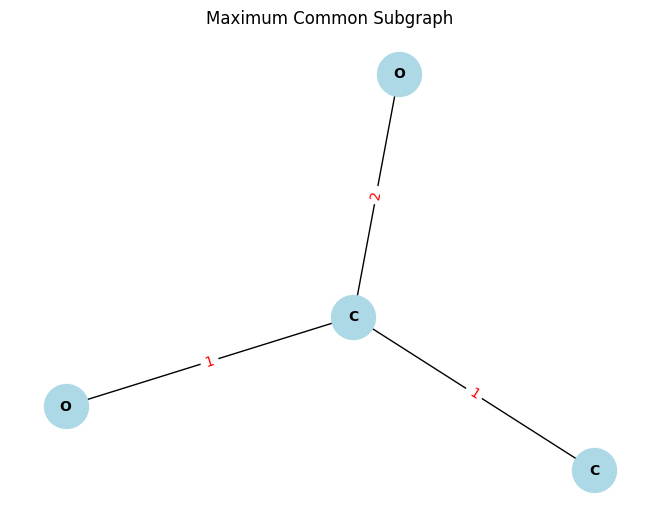

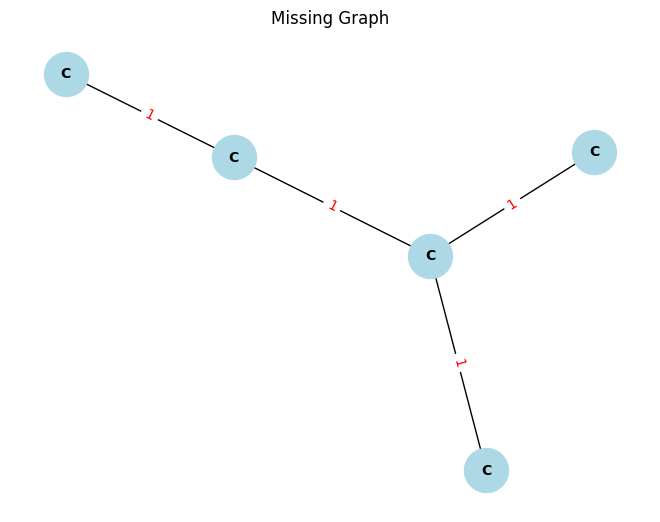

In [91]:
import networkx as nx
from pysmiles import read_smiles
import matplotlib.pyplot as plt

class ChemicalGraph:
    @staticmethod
    def smiles_to_graph(smiles):
        return read_smiles(smiles, explicit_hydrogen=False)

    @staticmethod
    def display(graph, title='Graph'):
        pos = nx.spring_layout(graph)
        node_labels = {node: data.get('element', node) for node, data in graph.nodes(data=True)}
        nx.draw(graph, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
        edge_labels = {(u, v): data.get('order', '') for u, v, data in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
        plt.title(title)
        plt.show()

    @staticmethod
    def find_mcs(ref_graph, hit_graph, ignore_atom_type=False, ignore_bond_type=False):
        node_match_func = lambda a, b: ((a['element'] == b['element']) and (a['charge'] == b['charge']) and (a['aromatic'] == b['aromatic'])) or ignore_atom_type
        edge_match_func = lambda a, b: (a['order'] == b['order']) or ignore_bond_type
        GM = nx.algorithms.isomorphism.GraphMatcher(ref_graph, hit_graph, node_match=node_match_func, edge_match=edge_match_func)
        try:
            mcs = max(GM.subgraph_isomorphisms_iter(), key=len)
            return ref_graph.subgraph(mcs)
        except ValueError:
            return None

    @staticmethod
    def subtract_graphs(main_graph, sub_graph):
        unique_graph = main_graph.copy()
        for node in sub_graph.nodes():
            if node in unique_graph:
                unique_graph.remove_node(node)
        return unique_graph

    @staticmethod
    def fit(reactant_smiles, product_smiles, display=True):
        reactant_graph = ChemicalGraph.smiles_to_graph(reactant_smiles)
        product_graph = ChemicalGraph.smiles_to_graph(product_smiles)

        mcs_graph = ChemicalGraph.find_mcs(reactant_graph, product_graph)
        if len(reactant_graph.nodes) >= len(mcs_graph.nodes):
            missing_graph = ChemicalGraph.subtract_graphs(reactant_graph, mcs_graph)
        else:
            missing_graph = ChemicalGraph.subtract_graphs(product_graph, mcs_graph)

        if display == True:

            if mcs_graph:
                ChemicalGraph.display(nx.Graph(mcs_graph), 'Maximum Common Subgraph')
            else:
                print("No Maximum Common Subgraph found.")

            

            if missing_graph:
                ChemicalGraph.display(nx.Graph(missing_graph), 'Missing Graph')
            else:
                print("No missing part found.")

        return mcs_graph, missing_graph

# Example usage of the new method
mcs_graph, missing_graph = ChemicalGraph.fit('CC(CC)COC(=O)C', 'CC(=O)O', display=True)


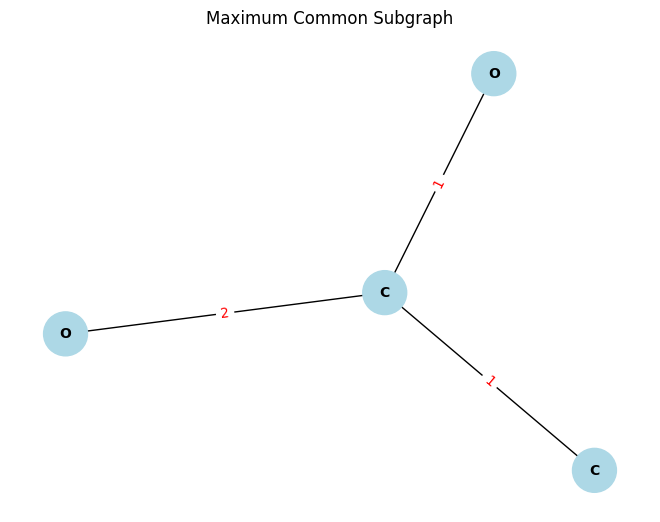

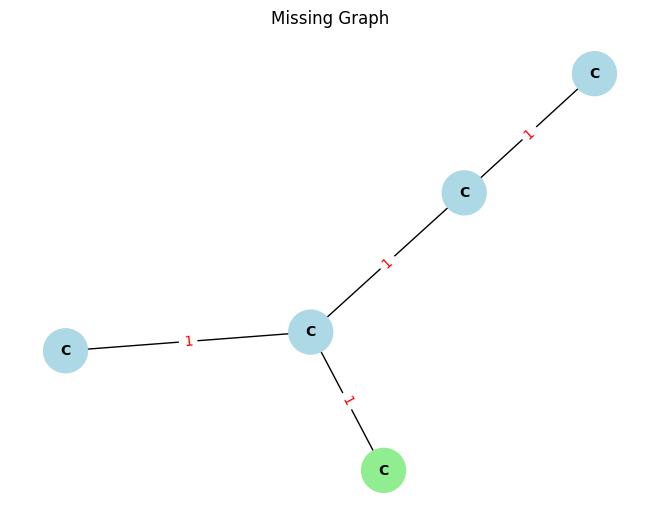

In [95]:
import networkx as nx
from pysmiles import read_smiles
import matplotlib.pyplot as plt

class ChemicalGraph:
    @staticmethod
    def smiles_to_graph(smiles):
        return read_smiles(smiles, explicit_hydrogen=False)

    @staticmethod
    def display(graph, title='Graph', highlight_nodes=None):
        pos = nx.spring_layout(graph)
        node_labels = {node: data.get('element', node) for node, data in graph.nodes(data=True)}
        node_color_map = ['lightblue' if node not in highlight_nodes else 'lightgreen' for node in graph.nodes()] if highlight_nodes else 'lightblue'

        nx.draw(graph, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_color_map, font_size=10, font_color='black', font_weight='bold')
        edge_labels = {(u, v): data.get('order', '') for u, v, data in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
        plt.title(title)
        plt.show()
    



    @staticmethod
    def find_mcs(ref_graph, hit_graph, ignore_atom_type=False, ignore_bond_type=False):
        node_match_func = lambda a, b: ((a['element'] == b['element']) and (a['charge'] == b['charge']) and (a['aromatic'] == b['aromatic'])) or ignore_atom_type
        edge_match_func = lambda a, b: (a['order'] == b['order']) or ignore_bond_type
        GM = nx.algorithms.isomorphism.GraphMatcher(ref_graph, hit_graph, node_match=node_match_func, edge_match=edge_match_func)
        try:
            mcs = max(GM.subgraph_isomorphisms_iter(), key=len)
            return ref_graph.subgraph(mcs)
        except ValueError:
            return None

    @staticmethod
    def subtract_graphs(main_graph, sub_graph):
        unique_graph = main_graph.copy()
        for node in sub_graph.nodes():
            if node in unique_graph:
                unique_graph.remove_node(node)
        return unique_graph
    
    @staticmethod
    def find_boundary_nodes(mcs_graph, main_graph):
        # Find nodes in MCS that have edges to nodes not in MCS
        boundary_nodes = set()
        for node in mcs_graph.nodes():
            for neighbor in main_graph.neighbors(node):
                if neighbor not in mcs_graph:
                    boundary_nodes.add(node)
        return boundary_nodes

    @staticmethod
    def fit(reactant_smiles, product_smiles, display=True):
        reactant_graph = ChemicalGraph.smiles_to_graph(reactant_smiles)
        product_graph = ChemicalGraph.smiles_to_graph(product_smiles)

        mcs_graph = ChemicalGraph.find_mcs(reactant_graph, product_graph)
        if len(reactant_graph.nodes) >= len(mcs_graph.nodes):
            missing_graph = ChemicalGraph.subtract_graphs(reactant_graph, mcs_graph)
            boundary_nodes = ChemicalGraph.find_boundary_nodes(missing_graph, reactant_graph)
        else:
            missing_graph = ChemicalGraph.subtract_graphs(product_graph, mcs_graph)
            boundary_nodes = ChemicalGraph.find_boundary_nodes(missing_graph, product_graph)

        #boundary_nodes = ChemicalGraph.find_boundary_nodes(mcs_graph, main_graph)


        if display == True:

            if mcs_graph:
                ChemicalGraph.display(nx.Graph(mcs_graph), 'Maximum Common Subgraph', highlight_nodes=boundary_nodes)
            else:
                print("No Maximum Common Subgraph found.")

            

            if missing_graph:
                ChemicalGraph.display(nx.Graph(missing_graph), 'Missing Graph', highlight_nodes=boundary_nodes)
            else:
                print("No missing part found.")

        return mcs_graph, missing_graph, boundary_nodes

# Example usage of the new method
mcs_graph, missing_graph, boundary_nodes = ChemicalGraph.fit('CC(CC)COC(=O)C', 'CC(=O)O', display=True)


In [ ]:
C5H12O

In [ ]:
reactant_graph = ChemicalGraph.smiles_to_graph('CC(CC)COC(=O)C')
product_graph = ChemicalGraph.smiles_to_graph('CC(=O)O')

In [96]:
missing_graph.nodes(data=True)

NodeDataView({0: {'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 3}, 1: {'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 1}, 2: {'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 2}, 3: {'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 3}, 4: {'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 2}})

In [97]:
missing_graph.edges(data=True)

EdgeDataView([(0, 1, {'order': 1}), (1, 2, {'order': 1}), (1, 4, {'order': 1}), (2, 3, {'order': 1})])

In [103]:
from rdkit import Chem
from rdkit.Chem import rdmolops

def graph_to_molecule(graph):
    mol = Chem.RWMol()

    # Map for bond types
    bond_type_map = {
        1: Chem.rdchem.BondType.SINGLE,
        2: Chem.rdchem.BondType.DOUBLE,
        3: Chem.rdchem.BondType.TRIPLE,
        'aromatic': Chem.rdchem.BondType.AROMATIC
        # Add other bond types if necessary
    }

    # Add atoms to the molecule
    node_to_idx = {}
    for node, data in graph.nodes(data=True):
        atom = Chem.Atom(data['element'])
        mol_idx = mol.AddAtom(atom)
        node_to_idx[node] = mol_idx

    # Add bonds to the molecule
    for u, v, data in graph.edges(data=True):
        bond_type = data.get('order')
        rdkit_bond_type = bond_type_map.get(bond_type)
        if rdkit_bond_type:
            mol.AddBond(node_to_idx[u], node_to_idx[v], rdkit_bond_type)

    # Sanitize the molecule (important for proper chemical structure)
    rdmolops.SanitizeMol(mol)

    display(mol)
    # Convert to SMILES (or another format as needed)
    smiles = Chem.MolToSmiles(mol)
    return smiles

# Example usage
# Ensure your graph has 'element' attributes for nodes and 'order' for edges
# smiles = graph_to_molecule(your_networkx_graph)


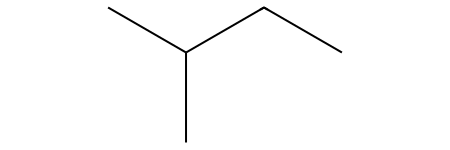

'CCC(C)C'

In [104]:
graph_to_molecule(missing_graph)

In [106]:
diff = [{"Diff_formula": {"O": 1, "H": 2, "Q": 0}, "new_reaction": "Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1>>O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1.[OH-].[H+]"}, {"Diff_formula": {"Cl": 1, "H": 1, "Q": 0}, "new_reaction": "CCOc1ccc(Oc2ncnc3c2cnn3C2CCNCC2)c(F)c1.O=C(Cl)OC1CCCC1>>CCOc1ccc(Oc2ncnc3c2cnn3C2CCN(C(=O)OC3CCCC3)CC2)c(F)c1.[H+].[Cl-]"}, {"Diff_formula": {"H": 2, "Q": 0}, "new_reaction": "COc1ccc(C(=O)Cc2c(Cl)c[n+]([O-])cc2Cl)c2c1OC1(CCCC1)O2.[HH]>>COc1ccc(C(O)Cc2c(Cl)c[n+]([O-])cc2Cl)c2c1OC1(CCCC1)O2"}, {"Diff_formula": {"O": 1, "H": 2, "Q": 0}, "new_reaction": "CC(C)(C)OC(=O)NN.O=C(O)c1ccc(Br)cc1Cl>>CC(C)(C)OC(=O)NNC(=O)c1ccc(Br)cc1Cl.[OH-].[H+]"}, {"Diff_formula": {"Br": 1, "H": 1, "Q": 0}, "new_reaction": "CCOP(=O)(CO)OCC.Nc1ncnc2c1nc(CBr)n2CCc1ccccc1>>CCOP(=O)(COCc1nc2c(N)ncnc2n1CCc1ccccc1)OCC.[H+].[Br-]"}, {"Diff_formula": {"C": 4, "H": 8, "Q": 0}, "new_reaction": "CC(C)(C)OC(=O)CONC(=O)NCc1cccc2ccccc12>>O=C(O)CONC(=O)NCc1cccc2ccccc12.CC.C#C"}, {"Diff_formula": {"C": 8, "O": 1, "H": 8, "Q": 0}, "new_reaction": "CCOC(=O)c1nnn(Cc2ccc(OC)cc2)c1C(=O)c1ccc(OC)c(OC)c1>>CCOC(=O)c1nn[nH]c1C(=O)c1ccc(OC)c(OC)c1.c1ccccc1O.C#C"}, {"Diff_formula": {"O": 1, "H": 2, "Q": 0}, "new_reaction": "CC(C)[C@H](NC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc1ccccc1)C(C)C)C(=O)O.COC(=O)CN>>COC(=O)CNC(=O)[C@@H](NC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc1ccccc1)C(C)C)C(C)C.[OH-].[H+]"}, {"Diff_formula": {"Br": 1, "H": 1, "Q": 0}, "new_reaction": "BrCc1ccccc1.Oc1ccc(O)c(Br)c1>>Oc1ccc(OCc2ccccc2)c(Br)c1.[H+].[Br-]"}, {"Diff_formula": {"Cl": 1, "H": 1, "Q": 0}, "new_reaction": "Cc1ccccc1C(=O)Cl.Nc1ccc(C(=O)N2Cc3ccccc3Sc3ncccc32)cc1>>Cc1ccccc1C(=O)Nc1ccc(C(=O)N2Cc3ccccc3Sc3ncccc32)cc1.[H+].[Cl-]"}, {"Diff_formula": {"F": 1, "H": 1, "Q": 0}, "new_reaction": "Fc1ccc(C(F)(F)F)cc1Br.c1ccc2c(c1)NCCO2>>FC(F)(F)c1ccc(N2CCOc3ccccc32)c(Br)c1.[H+].[F-]"}, {"Diff_formula": {"F": 1, "H": 1, "Q": 0}, "new_reaction": "CC(C)S.Fc1cccnc1F>>CC(C)Sc1ncccc1F.[H+].[F-]"}, {"Diff_formula": {"Cl": 1, "H": 1, "Q": 0}, "new_reaction": "COC(=O)C(C)(C)CN1CCNCC1.Cc1cc2n(c1)Cc1cc(Cl)ccc1N=C2Cl>>COC(=O)C(C)(C)CN1CCN(C2=Nc3ccc(Cl)cc3Cn3cc(C)cc32)CC1.[H+].[Cl-]"}, {"Diff_formula": {"O": 1, "H": 2, "Q": 0}, "new_reaction": "O=C1CNC(=O)N1.O=Cc1cnn2c(NC3CC3)cc(NC3CCCC3)nc12>>O=C1NC(=O)/C(=C/c2cnn3c(NC4CC4)cc(NC4CCCC4)nc23)N1.[OH-].[H+]"}]

In [112]:
from SynRBL.rsmi_utils import load_database
diff = load_database('test.json')

In [113]:
def remove_duplicate_diff_formulas(data):
    seen_formulas = set()
    unique_data = []

    for entry in data:
        # Convert the Diff_formula dictionary to a frozenset for immutability and hashability
        formula_key = frozenset(entry['Diff_formula'].items())
        
        if formula_key not in seen_formulas:
            seen_formulas.add(formula_key)
            unique_data.append(entry)

    return unique_data



unique_data = remove_duplicate_diff_formulas(diff)


In [115]:
len(unique_data)

127

In [116]:
def remove_duplicate_diff_formulas(data):
    seen_formulas = set()
    unique_data = []

    for entry in data:
        formula_key = frozenset(entry['Diff_formula'].items())
        if formula_key not in seen_formulas:
            seen_formulas.add(formula_key)
            unique_data.append(entry)

    return unique_data

def sort_by_diff_formula_length(data):
    return sorted(data, key=lambda x: len(x['Diff_formula']))

# Remove duplicates
unique_data = remove_duplicate_diff_formulas(diff)

# Sort by length of 'Diff_formula'
sorted_data = sort_by_diff_formula_length(unique_data)


In [139]:
sorted_data[41:50]

[{'Diff_formula': {'I': 2, 'H': 2, 'Q': 0},
  'new_reaction': 'COC(=O)c1cc(N)cc(C(=O)OC)c1.ICCCCI>>COC(=O)c1cc(C(=O)OC)cc(N2CCCC2)c1.[HH].II'},
 {'Diff_formula': {'O': 3, 'H': 8, 'Q': 0},
  'new_reaction': 'Nc1ccc(F)cc1.OCC(O)CO>>Fc1ccc2ncccc2c1.O=O.[OH-].[HH].[H+]'},
 {'Diff_formula': {'Mg': 1, 'I': 1, 'Q': 1},
  'new_reaction': 'C=CCCC[Mg+].N#Cc1ccc([C@@H]2CC[C@@H](CI)CC2)cc1>>C=CCCCC[C@@H]1CC[C@@H](c2ccc(C#N)cc2)CC1.[Mg+2].[I-]'},
 {'Diff_formula': {'Mg': 1, 'F': 1, 'Q': 1},
  'new_reaction': 'CCCC[Mg+].O=C(O)c1ccc2ccccc2c1F>>CCCCc1c(C(=O)O)ccc2ccccc12.[Mg+2].[F-]'},
 {'Diff_formula': {'C': 5, 'H': 8, 'Q': 0},
  'new_reaction': 'CCS(=O)(=O)c1ccc(NC(=O)CCCc2ccc(B3OCC(C)(C)CO3)cc2C)cc1C#N>>CCS(=O)(=O)c1ccc(NC(=O)CCCc2ccc(B(O)O)cc2C)cc1C#N.C#C.C'},
 {'Diff_formula': {'C': 8, 'O': 1, 'H': 8, 'Q': 0},
  'new_reaction': 'CCOC(=O)c1nnn(Cc2ccc(OC)cc2)c1C(=O)c1ccc(OC)c(OC)c1>>CCOC(=O)c1nn[nH]c1C(=O)c1ccc(OC)c(OC)c1.c1ccccc1O.C#C'},
 {'Diff_formula': {'C': 5, 'O': 3, 'H': 10, 'Q': 0},
  'new_

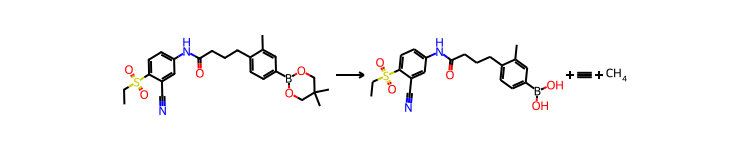

In [145]:
from rdkit.Chem import AllChem, rdChemReactions
smi = sorted_data[45:46][0]['new_reaction']
rxn = rdChemReactions.ReactionFromSmarts(smi, useSmiles= True)

rxn

In [134]:
sorted_data[30:31][0]

{'Diff_formula': {'I': 1, 'Cu': 1, 'Q': 0},
 'new_reaction': 'COc1ccc(-c2cnc3c(n2)c(I)cn3S(=O)(=O)c2ccc(C)cc2)cc1OC.N#C[Cu]>>COc1ccc(-c2cnc3c(n2)c(C#N)cn3S(=O)(=O)c2ccc(C)cc2)cc1OC.[Cu+].[I-]'}

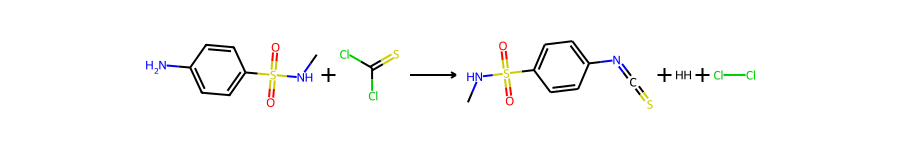

In [129]:
from rdkit.Chem import AllChem, rdChemReactions
smi = 'CNS(=O)(=O)c1ccc(N)cc1.S=C(Cl)Cl>>CNS(=O)(=O)c1ccc(N=C=S)cc1.[HH].ClCl'
rxn = rdChemReactions.ReactionFromSmarts(smi, useSmiles= True)

rxn

In [ ]:
H:2; Cl:2

In [ ]:
{'Q':1, 'H':1}
{'Q':0, 'H':2}